---
layout: post
title:  "AO3 Trivia: Popular Tags Part II"
date:   2021-06-10
categories: visualization
tags: Python Pandas Circlify Regex Matplotlib
---

In this section, we use the python [Circlify](https://github.com/elmotec/circlify) library and matplotlib to visualize the popular tags on AO3. We'll be following the [Basic Circle Packing Chart
](https://www.python-graph-gallery.com/circular-packing-1-level-hierarchy) example on Python Graph Gallery.

* Table of Contents
{:toc}

# Loading File

In [1]:
# Load python libraries
import pandas as pd

Here we use a csv file "fandom500.csv", it is the top 500 most popular fandoms based on cached_count extracted from the original file tags-20210226.csv. The previous post covers how to find popular tags. 

In [2]:
# Load data
# Only load first 20 rows from the file
fandom = pd.read_csv("fandom500.csv", nrows=20)

In [5]:
# preview
fandom[:5]

,Unnamed: 0,id,type,name,canonical,cached_count,merger_id
0,94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
1,25,27,Fandom,Supernatural,True,310300,NaN
2,230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
3,1553725,3828398,Fandom,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,True,204096,NaN
4,680695,1002903,Fandom,방탄소년단 | Bangtan Boys | BTS,True,203097,NaN


# Circlify

We use [Circlify](https://github.com/elmotec/circlify) to generate a basic circle packing chart representing the 20 most popular fandoms on AO3. 

In [9]:
%matplotlib inline

# Load matplotlib
import matplotlib.pyplot as plt

# Load the circlify library
import circlify

In [7]:
# Data is a list of positive values sorted from largest to smallest.
# Compute circle positions:
circles = circlify.circlify(
    fandom.cached_count.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

In [8]:
# Preview
circles[:10]

[Circle(x=-0.5059826765465478, y=0.7164728244834262, r=0.12287299825597259, level=1, ex={'datum': 60008}),
 Circle(x=-0.784426155399832, y=0.3403961376432391, r=0.12318588426100985, level=1, ex={'datum': 60314}),
 Circle(x=0.30366446944493447, y=0.7688619710123179, r=0.12919805590982159, level=1, ex={'datum': 66345}),
 Circle(x=-0.1494359955824714, y=0.7915035957280849, r=0.13002789025498526, level=1, ex={'datum': 67200}),
 Circle(x=-0.5658025925053127, y=0.46985740969013184, r=0.13089379460507566, level=1, ex={'datum': 68098}),
 Circle(x=-0.7481171059523007, y=-0.06757414988202783, r=0.15188595016235845, level=1, ex={'datum': 91692}),
 Circle(x=-0.664278156659797, y=-0.3929803440624641, r=0.1551327343608837, level=1, ex={'datum': 95654}),
 Circle(x=-0.28884396308873017, y=0.5424213773613182, r=0.15541305444415118, level=1, ex={'datum': 96000}),
 Circle(x=-0.5500991559526954, y=0.17676556661001908, r=0.16261843069339346, level=1, ex={'datum': 105108}),
 Circle(x=-0.07815880962512435, y

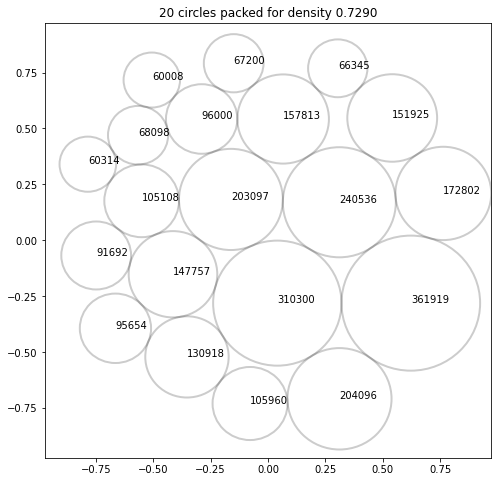

In [10]:
# Visualization with circlify.Bubbles()
circlify.bubbles(circles=circles)

The default function circlify.Bubbles() generates a circle packing chart with the cached_count. It is difficult to add annotations and other customization on the chart. We'll follow the [Basic Circle Packing Chart
](https://www.python-graph-gallery.com/circular-packing-1-level-hierarchy) example on Python Graph Gallery to plot the chart with matplotlib.

# Matplotlib Circles

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_

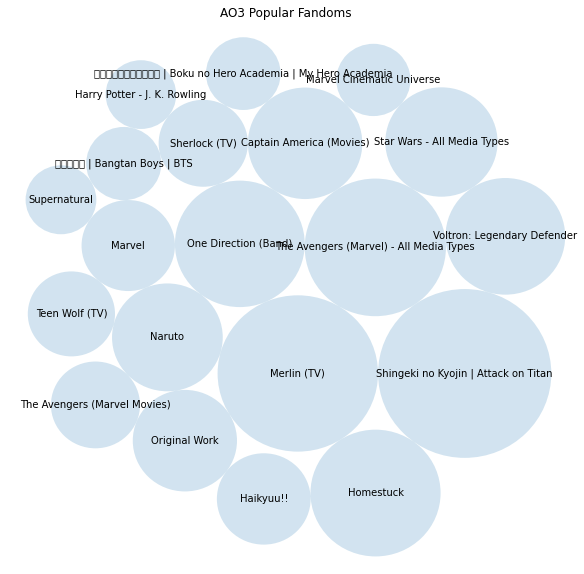

In [12]:
# Create just a figure and only one subplot
# Must use plt.subplots instead of subplot
# In Jupyter notebook, include all code in one cell

fig, ax = plt.subplots(figsize=(10,10))

# Find axes boundaries
# This is due to ax.add_patch() not updating boundaries
# Thus to avoid drawing circles outside of fig

lim = max([max(abs(circle.x)+circle.r, abs(circle.y)+circle.r) for circle in circles])
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

# List of labels to add on the circles
labels = fandom.name

# Remove axis
# Add title

plt.axis('off')
plt.title('AO3 Popular Fandoms')

# print circles

for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x,y), r, alpha=0.2,linewidth=2))
    plt.annotate(label, (x,y), va='center',ha='center')

We have successfully added the labels to the circles. However the text string is too long and not very visually pleasing. We're going to shorten the labels with regular expression.

# Regular Expression

Here's the plan. We want to get rid of some addtional information on the labels. We want to match string before the parentheses, or after the | sign, or before the hyphen. A great way to test out your regular expression is to use [regex101](https://regex101.com/).

- Text string before the parentheses:

We use [lookahead](https://www.regular-expressions.info/lookaround.html) assertion **(?=\\()** to matches a text string that is followed by a "(", without making the "(" part of the match. Note that "\\" is the escape character.

- Text string before a hyphen:

Same as above, we use lookahead **(?=\\-)** to match the string before the hyphen.

- Text string after "|":

We first flip the text string so that we can match the text before the first "|", then we flip the string back.

In [13]:
# Load library
import re

In [14]:
# Create a function to match string

def short(s):
    if "(" in s:
        return re.match(r".*(?=\()", s).group().strip()
    elif "-" in s:
        return re.match(r".*(?=\-)", s).group().strip()
    elif "|" in s:
        return re.match(r"^(.*?)(?=\|)", s[::-1]).group().strip()[::-1]
    else: 
        return s

In [15]:
# Original labels
labels[:5]

0                         Harry Potter - J. K. Rowling
1                                         Supernatural
2                            Marvel Cinematic Universe
3    僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...
4                           방탄소년단 | Bangtan Boys | BTS
Name: name, dtype: object

In [16]:
# Use .apply() to apply the function on the original labels
labels2 = labels.apply(lambda x: short(x))

In [17]:
# Short labels
labels2[:5]

0                 Harry Potter
1                 Supernatural
2    Marvel Cinematic Universe
3             My Hero Academia
4                          BTS
Name: name, dtype: object

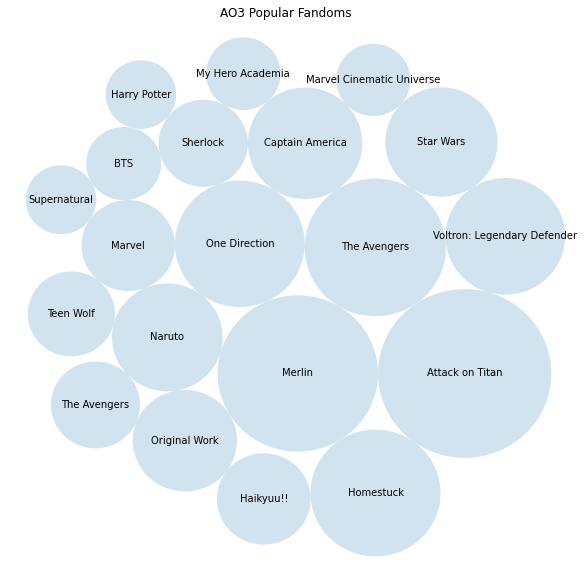

In [18]:
# Repeat the above plotting process
# This time with short labels

# Create just a figure and only one subplot
# Must use plt.subplots instead of subplot
# In Jupyter notebook, include all code in one cell

fig, ax = plt.subplots(figsize=(10,10))

# Find axes boundaries
# This is due to ax.add_patch() not updating boundaries
# Thus avoid drawing circles outside of fig

lim = max([max(abs(circle.x)+circle.r, abs(circle.y)+circle.r) for circle in circles])
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

# List of labels to add on the circles
labels = fandom.name

# Remove axis
# Add title

plt.axis('off')
plt.title('AO3 Popular Fandoms')

# print circles

for circle, label in zip(circles, labels2):
    x, y, r = circle
    ax.add_patch(plt.Circle((x,y), r, alpha=0.2,linewidth=2))
    plt.annotate(label, (x,y), va='center',ha='center')